# Streaming Application

## 1. Business Understanding

### Introduction

Streaming app viewership data represents a collection of information related to how users interact with a streaming application. This data provides insights into user behaviour, content consumption, and the overall performance of the streaming service.

### Context

In order to fully understand the topic, let's get some context with the following articles:
- [*Behind the Stream*](https://www.adweek.com/resource-library/whats-shaping-todays-movie-and-tv-streaming-viewer-behavior/) from the Harris Poll on behalf of [Tubi](https://gdpr.tubi.tv/).\
    This reports recovers data from 2,503 adults within the United States aged 18+ that stream video at least 1 hour a week. 
- [Powerful Streaming Statistics to Know in 2024](https://learn.g2.com/streaming-statistics) from Learn Hub by G2.
- [Top Streaming Statistics In 2024](https://www.forbes.com/home-improvement/internet/streaming-stats/) by Forbes Home
- [Streaming Costs Increasing Over the Last Year](https://www.forbes.com/home-improvement/internet/streaming-survey/) by Forbes Home
- [The Revolution in Streaming Services](https://www.linkedin.com/pulse/revolution-streaming-services-how-consumer-behaviour-shaping-jain/) by @Castler | LinkedIn

## 2. Data Mining

#### Data source

[Streaming Application is a dataset from Kaggle](https://www.kaggle.com/datasets/rajatkumar30/streaming-application-viewership) 

#### Metadata

- **User_ID:** A unique identifier for the user.
- **Session_ID:** A unique identifier for the user's session.
- **Device_ID:** An identifier for the user's device.
- **Video_ID:** An identifier for the video content being viewed.
- **Duration_Watched (minutes):** The amount of time (in minutes) the user spent watching the video.
- **Genre:** The genre of the video content (e.g., Action, Comedy, Drama, etc.).
- **Country:** The country where the interaction event took place.
- **Age:** The age of the user.
- **Gender:** The gender of the user (e.g., Male, Female).
- **Subscription_Status:** The user's subscription status (e.g., Free, Premium).
- **Ratings:** The user's rating or feedback for the content (typically on a scale from 1 to 5).
- **Languages:** The language of the content being viewed.
- **Device_Type:** The type of device used by the user (e.g., Smartphone, Tablet, etc.).
- **Location:** The location or city where the interaction event occurred.
- **Playback_Quality:** The quality of video playback (e.g., HD, SD, 4K).
- **Interaction_Events:** The count of interaction events that occurred during the user's session (e.g., clicks, likes, shares, etc.).

#### Libraries

In [933]:
import pandas as pd
import numpy as np

import time
import datetime
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
import pycountry

#### Load the data

In [934]:
streaming = pd.read_csv('datasets\streaming_viewership_data.csv')
streaming.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6214 entries, 0 to 6213
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     6214 non-null   object 
 1   Session_ID                  6214 non-null   object 
 2   Device_ID                   6214 non-null   int64  
 3   Video_ID                    6214 non-null   int64  
 4   Duration_Watched (minutes)  6214 non-null   float64
 5   Genre                       6214 non-null   object 
 6   Country                     6214 non-null   object 
 7   Age                         6214 non-null   int64  
 8   Gender                      6214 non-null   object 
 9   Subscription_Status         6214 non-null   object 
 10  Ratings                     6214 non-null   int64  
 11  Languages                   6214 non-null   object 
 12  Device_Type                 6214 non-null   object 
 13  Location                    6214 

In [935]:
streaming.head()

,User_ID,Session_ID,Device_ID,Video_ID,Duration_Watched (minutes),Genre,Country,Age,Gender,Subscription_Status,Ratings,Languages,Device_Type,Location,Playback_Quality,Interaction_Events
0,eb4f9229-74df-45f6-baac-cf19241b8b30,cb2142a7-0750-49ed-b8ac-a975fe1ff69a,232,11,90.044525,Sci-Fi,Sudan,56,Female,Premium,3,Spanish,Smartphone,Reedshire,4K,73
1,661d4b59-4328-410a-901c-1e3b4c40c334,3bc0a662-b353-4015-8b0c-55ceb510d13a,549,85,68.973479,Comedy,Cuba,52,Male,Premium,3,Chinese,Desktop,Stevenhaven,SD,22
2,dd3fe9e9-ea82-4891-ab93-8a47c80e3251,bd545b4a-9f54-4e87-b9f8-15ae20b44f22,844,50,42.511343,Comedy,Japan,14,Female,Premium,3,Spanish,Tablet,Vaughntown,HD,41
3,a1b3365b-1d00-4ddf-bc43-02fc9c10c680,0441086d-c59e-478d-a496-5c5b995ecfdb,201,38,53.316660,Documentary,Lao People's Democratic Republic,36,Male,Premium,2,Spanish,Laptop,East Raymondbury,SD,40
4,338d3f91-5f1c-4590-8803-324901826406,0295f01d-7f15-4799-856c-90c688697ef8,700,31,69.437786,Action,Bangladesh,31,Male,Premium,4,German,Laptop,Michaelchester,HD,41


## 3. Data Cleaning

Identifing and removing null values, errors, inaccuracies or redundance from the data.

### Missing Data

In [936]:
# Checking for missing data
streaming.isnull().sum().sort_values(ascending=False)

User_ID                       0
Session_ID                    0
Device_ID                     0
Video_ID                      0
Duration_Watched (minutes)    0
Genre                         0
Country                       0
Age                           0
Gender                        0
Subscription_Status           0
Ratings                       0
Languages                     0
Device_Type                   0
Location                      0
Playback_Quality              0
Interaction_Events            0
dtype: int64

In [937]:
# Identifying columns in the dataframe where over 70% of the values are missing
streaming.columns[streaming.isnull().mean() > 0.7]

Index([], dtype='object')

In [938]:
# Filtering out columns in the dataframe where more than 70% of the values are missing
streaming = streaming[streaming.columns[streaming.isnull().mean() < 0.7]]

## 4. Data Profiling

### Structure Discovery

Structure discovery is the process of validating that data is consistent and properly formatted. It is sometimes also referred to as structure analysis.

In [939]:
streaming.shape

(6214, 16)

In [940]:
streaming.dtypes

User_ID                        object
Session_ID                     object
Device_ID                       int64
Video_ID                        int64
Duration_Watched (minutes)    float64
Genre                          object
Country                        object
Age                             int64
Gender                         object
Subscription_Status            object
Ratings                         int64
Languages                      object
Device_Type                    object
Location                       object
Playback_Quality               object
Interaction_Events              int64
dtype: object

In [941]:
streaming.columns

Index(['User_ID', 'Session_ID', 'Device_ID', 'Video_ID',
       'Duration_Watched (minutes)', 'Genre', 'Country', 'Age', 'Gender',
       'Subscription_Status', 'Ratings', 'Languages', 'Device_Type',
       'Location', 'Playback_Quality', 'Interaction_Events'],
      dtype='object')

#### Exploring Numerical and Categorical Variables

In [942]:
# Extracting column names with numerical data types from the dataframe
streaming.select_dtypes("number").columns

Index(['Device_ID', 'Video_ID', 'Duration_Watched (minutes)', 'Age', 'Ratings',
       'Interaction_Events'],
      dtype='object')

In [943]:
# Counting and sorting the unique values for each numerical column in descending order
streaming.select_dtypes("number").nunique().sort_values(ascending=False)

Duration_Watched (minutes)    6214
Device_ID                     1000
Interaction_Events             101
Video_ID                       100
Age                             61
Ratings                          5
dtype: int64

In [944]:
# Separating between discrete and continuous variables, as discrete ones could potentially be treated as categorical.
# Remember to adjust the threshold (in this case, < 20) based on your dataset's specific characteristics and domain knowledge.
potential_categorical_from_numerical = streaming.select_dtypes("number").loc[:, streaming.select_dtypes("number").nunique() < 20]
potential_categorical_from_numerical.value_counts()

Ratings
3          1301
2          1242
1          1237
4          1230
5          1204
Name: count, dtype: int64

In [945]:
# Retrieving column names with object (typically string) data types from the dataframe
streaming.select_dtypes("object").columns

Index(['User_ID', 'Session_ID', 'Genre', 'Country', 'Gender',
       'Subscription_Status', 'Languages', 'Device_Type', 'Location',
       'Playback_Quality'],
      dtype='object')

In [946]:
# Counting and sorting the unique values for each object (string) column in descending order
streaming.select_dtypes("object").nunique().sort_values(ascending=False)

User_ID                6214
Session_ID             6214
Location               5169
Country                 243
Genre                     6
Languages                 5
Device_Type               5
Playback_Quality          3
Gender                    2
Subscription_Status       2
dtype: int64

#### Defining Numerical and Categorical Variables

In [947]:
# Extracting columns with object (typically string) data types to create a categorical dataframe
# Also, I'm including the columns in potential_categorical_from_numerical as categorical variables.
streaming_categorical = pd.concat([streaming.select_dtypes("object"), potential_categorical_from_numerical], axis=1)

# Adjusting the numerical dataframe by removing the moved columns
streaming_numerical = streaming.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)

In [948]:
# Verifying that the total number of columns in the dataframe is the sum of object (string) and numerical columns
len(streaming.columns) == len(streaming.select_dtypes("object").columns) + len(streaming.select_dtypes("number").columns)

True

##### EDA for Numerical Variables

In [949]:
#TODO complete with this https://chatgpt.com/share/58d4e0a7-6fb0-4611-92f4-993c025ebb40

In [950]:
streaming_numerical.describe()

,Device_ID,Video_ID,Duration_Watched (minutes),Age,Interaction_Events
count,6214.000000,6214.000000,6214.000000,6214.000000,6214.000000
mean,496.762150,50.323785,60.378389,39.665594,50.776794
std,287.681163,28.671178,34.597273,17.571317,29.009363
min,1.000000,1.000000,0.055809,10.000000,0.000000
25%,248.000000,26.000000,30.413538,24.000000,26.000000
50%,493.500000,50.000000,60.765637,40.000000,51.000000
75%,742.000000,75.000000,90.874141,55.000000,76.000000
max,1000.000000,100.000000,119.999972,70.000000,100.000000


##### EDA for Categorical Variables

#### Hypotesis Definition

1. The most common recommenders are user of streaming are adults.
2. The duration spent in the action genre by Males is higher than in Females
3. The duration spent in the Drama genre by Females is higher than in Males
4. Premium users tend to rate content lower than Free users
5. Premium users spend more time watching content than Free users
6. Content streamed in Smartphones and Tables are of lower quality than other devices
7. Playback quality of 4k is mostly watched on Smart TVs
8. Users below 40 tend to have in average more interaction events than older users
9. The quantity of premium users grows as users are older (there are more premium users at 40 years old, than those at 20s)
10. English is the prefer language for streaming. 

### Content and Relationship Discovery

Now, let's examine the specifics of each column in detail.

##### User_ID and Session_ID

In [951]:
streaming['User_ID'].nunique()

6214

In [952]:
streaming['Session_ID'].nunique()

6214

To confirm if each User_ID is associated with only one unique Session_ID, we can group the data by User_ID and count the distinct Session_ID values for each user. If any user has a count greater than 1, it means that a User_ID is associated with more than one Session_ID.

In [953]:
# Group by User_ID and count distinct Session_IDs
distinct_session_counts = streaming.groupby('User_ID')['Session_ID'].nunique().reset_index()

# Check for any User_ID with more than one distinct Session_ID
multiple_sessions = distinct_session_counts[distinct_session_counts['Session_ID'] > 1]

# Display the result
print(multiple_sessions)

Empty DataFrame
Columns: [User_ID, Session_ID]
Index: []


The dataset found no users with multiple session IDs, confirming that the User_ID and Session_ID are in a one-to-one relationship.

##### Device_ID

In [954]:
streaming['Device_ID'].nunique()

1000

In [955]:
# Extract unique Device_ID values and sort them in ascending order
np.sort(streaming['Device_ID'].unique())

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
         56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
         78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
         89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
        100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
        111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
        122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
        133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
        144,  145,  146,  147,  148,  149,  150,  1

It seems there is possible sequential assignment for the Device_ID values as these are assigned sequentially, perhaps there is an ID generation mechanism where new devices are incrementally assigned the next available integer ID as they are added to the system.

To analyze whether a device can have more than one user connected, let's group the data by Device_ID and check how many distinct User_ID values are associated with each device. 

In [956]:
# Group by Device_ID and count distinct User_IDs
device_user_counts = streaming.groupby('Device_ID')['User_ID'].nunique().reset_index()

# Rename the column for clarity
device_user_counts.rename(columns={'User_ID': 'User_Count_per_Device'}, inplace=True)

# Group by User_Count_per_Device and count the number of devices for each distinct user count
distinct_user_count_summary = device_user_counts.groupby('User_Count_per_Device')['Device_ID'].count().reset_index()

# Rename columns for clarity
distinct_user_count_summary.rename(columns={'Device_ID': 'Device_Count'}, inplace=True)

# Sort the results by User_Count_per_Device in descending order
distinct_user_count_summary.sort_values(by='User_Count_per_Device', ascending=False)

,User_Count_per_Device,Device_Count
14,16,1
13,14,1
12,13,9
11,12,20
10,11,22
9,10,46
8,9,85
7,8,103
6,7,138
5,6,161


- While some devices are highly shared, a large proportion is shared among small groups, particularly with 6 users.

- Devices shared by many users (16 and 14 users) might be found in communal settings, while those with 6 users could represent family or small office environments.

- The 15 devices used by only one user suggest either dedicated personal usage or lack of accessibility for sharing.

##### Video_ID

In [957]:
streaming['Video_ID'].nunique()

100

In [958]:
# Extract unique Video_ID values and sort them in ascending order using numpy
np.sort(streaming['Video_ID'].unique())

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

The Video_ID range from 1 to 100 indicates that the dataset includes exactly 100 distinct videos (movies, series, etc.). This suggests that the dataset is fixed to include only 100 available videos on the platform, potentially the most-watched content.

To find out how many users have watched each Video_ID, let's group the data by Video_ID and count the number of distinct User_ID values associated with each video. 

In [959]:
# Group by Video_ID and count distinct User_IDs
video_user_counts = streaming.groupby('Video_ID')['User_ID'].nunique().reset_index()

# Rename the column for clarity
video_user_counts.rename(columns={'User_ID': 'User_Count_per_Device'}, inplace=True)

# Sort the data by User_Count_per_Device in descending order (optional)
video_user_counts_sorted = video_user_counts.sort_values(by='User_Count_per_Device', ascending=False)

In [960]:
video_user_counts_sorted.head(n=10)

,Video_ID,User_Count_per_Device
39,40,79
28,29,78
10,11,77
89,90,76
82,83,76
58,59,76
53,54,75
43,44,74
23,24,73
77,78,71


In [961]:
video_user_counts_sorted.tail(n=10)

,Video_ID,User_Count_per_Device
47,48,52
49,50,52
0,1,52
9,10,51
7,8,51
90,91,50
61,62,50
52,53,49
98,99,47
38,39,46


- The top 10 most-watched videos each have more than 70 distinct users. Video_ID 40 is the most watched, with 79 distinct users.

- The bottom 10 least-watched videos have around 50 distinct users each. Video_ID 39 is the least watched, with only 46 distinct users.

##### Duration_Watched (minutes)

In [962]:
streaming['Duration_Watched (minutes)'].nunique()

6214

To analyze the distribution of the Duration_Watched (minutes) column from the most engaging (longest watched) to the least engaging (shortest watched), let's sort the data (in descending order).

In [963]:
# Sort the Duration_Watched (minutes) column
sorted_durations = streaming['Duration_Watched (minutes)'].sort_values()

# Display the sorted durations
print(sorted_durations.head(10))  # Show the first 10 sorted durations
print(sorted_durations.tail(10))  # Show the last 10 sorted durations

2526    0.055809
5222    0.061911
3915    0.072536
1335    0.080602
4755    0.092152
3709    0.096735
5872    0.110173
5622    0.130475
2549    0.135560
3814    0.139156
Name: Duration_Watched (minutes), dtype: float64
5552    119.900747
2280    119.916255
5224    119.920952
3837    119.925319
6189    119.926372
2175    119.945439
2071    119.958384
955     119.974953
6079    119.990886
1587    119.999972
Name: Duration_Watched (minutes), dtype: float64


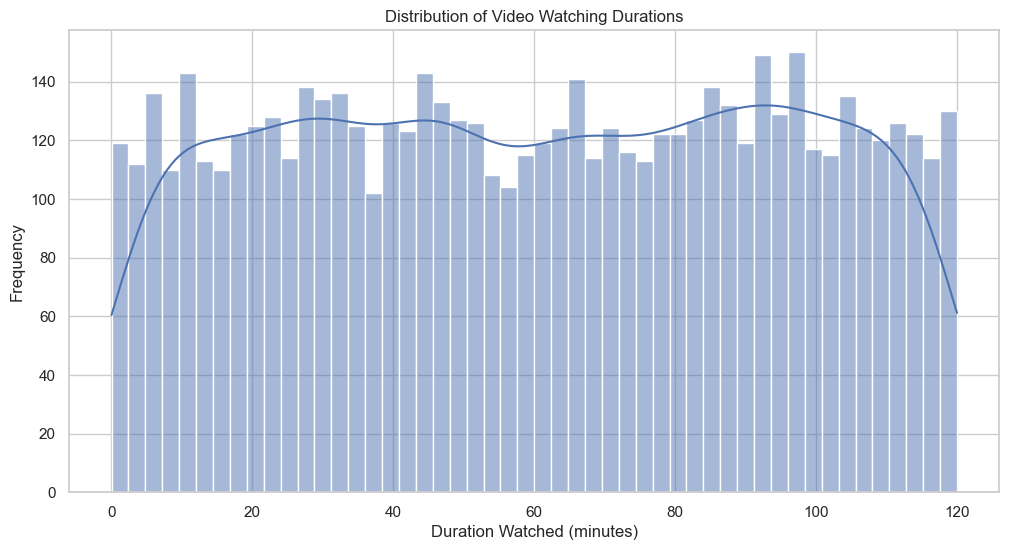

In [964]:
# Set up the figure size and style
plt.figure(figsize=(12, 6))
sns.set(style='whitegrid')

# Plot the histogram
sns.histplot(streaming['Duration_Watched (minutes)'], bins=50, kde=True)

# Add labels and title
plt.xlabel('Duration Watched (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Video Watching Durations')
plt.show()

- Short Durations: The shortest durations are just a few seconds, indicating some users barely engage with certain videos.

- Long Durations: The longest durations are close to 120 minutes, suggesting that some users watch videos for extended periods, likely indicating full-length content consumption (movies or documentals).

- Distribution Pattern: The histogram shows a skew towards shorter durations, with a peak at shorter viewing times and a gradual decline towards longer durations. This pattern is typical, as users often watch shorter videos or only a portion of longer content.

##### Country

In [965]:
streaming['Country'].nunique()

243

In [966]:
country_list = streaming['Country'].unique()
country_list

array(['Sudan', 'Cuba', 'Japan', "Lao People's Democratic Republic",
       'Bangladesh', 'Tokelau', 'Guyana', 'Guinea', 'Palau', 'Ecuador',
       'Iceland', 'Colombia', 'Dominican Republic', 'Georgia', 'Malaysia',
       'Togo', 'Iran', 'Estonia', 'Korea', 'Lebanon',
       'Trinidad and Tobago', 'Saint Vincent and the Grenadines',
       'Belarus', 'Northern Mariana Islands', 'Jersey', 'Niue', 'Lesotho',
       'Anguilla', 'Romania', 'Uganda', 'Comoros', 'Austria', 'Paraguay',
       'Angola', 'Philippines', 'Cambodia', 'Benin', 'Yemen',
       'Luxembourg', 'Malawi', 'Heard Island and McDonald Islands',
       'Wallis and Futuna', 'Macao', 'Honduras', 'Liechtenstein',
       'Uruguay', 'Cameroon', 'Cape Verde', 'San Marino', 'Guadeloupe',
       'Dominica', 'Egypt', 'Jamaica', 'Portugal', 'French Polynesia',
       'Gambia', 'Niger', 'Fiji', 'United States Virgin Islands', 'Aruba',
       'French Southern Territories', 'China', 'Sweden', "Cote d'Ivoire",
       'Saudi Arabia', 'Cro

To determine whether the countries in the dataset match the list of ISO 3166 country codes, let's compare the list of unique country names against a standard ISO 3166-1 country code list. The ISO 3166 standard provides internationally recognized codes for the names of countries.

In [967]:
# Get the ISO 3166 country list
iso_countries = {country.name for country in pycountry.countries}

# Check which countries are not in the ISO 3166 list
non_iso_countries = [country for country in streaming['Country'] if country not in iso_countries]

# Count how many match
matched_countries = len(streaming['Country']) - len(non_iso_countries)

# Count the number of non-matching countries
non_matching_count = len(non_iso_countries)

# Display the number of matches and non-matching countries
print("\nTotal unique countries in dataset:", len(streaming['Country']))
print("Number of countries that match the ISO 3166 list:", matched_countries)
print("\nNumber of countries not matched to ISO 3166 list:", non_matching_count)

# Display the countries that don't match the ISO 3166 list
print("Countries not in the ISO 3166 list:")
print(non_iso_countries)


Total unique countries in dataset: 6214
Number of countries that match the ISO 3166 list: 5415

Number of countries not matched to ISO 3166 list: 799
Countries not in the ISO 3166 list:
['Iran', 'Korea', 'Iran', 'Cape Verde', 'Korea', 'United States Virgin Islands', 'Cape Verde', "Cote d'Ivoire", 'Venezuela', 'Tanzania', 'Bolivia', 'Palestinian Territory', 'Venezuela', 'Korea', 'Korea', 'Cape Verde', 'Bolivia', 'British Virgin Islands', 'Reunion', 'Turkey', 'Czech Republic', 'Saint Helena', 'Bolivia', 'Slovakia (Slovak Republic)', 'Saint Barthelemy', 'Korea', 'Saint Helena', 'Netherlands Antilles', 'Saint Martin', 'Libyan Arab Jamahiriya', 'British Indian Ocean Territory (Chagos Archipelago)', 'Svalbard & Jan Mayen Islands', 'Venezuela', 'Bouvet Island (Bouvetoya)', 'Micronesia', 'Vietnam', "Cote d'Ivoire", 'Saint Barthelemy', 'Korea', 'United States of America', 'Korea', "Cote d'Ivoire", 'Vietnam', 'Netherlands Antilles', 'Saint Martin', 'Czech Republic', 'British Indian Ocean Territ

- Global Reach: The data suggests a wide geographical reach, covering most countries worldwide. This diversity could indicate that the platform is globally accessible or popular across many regions.

- Some country names might not match due to common variations or outdated names.

##### Genre

In [968]:
streaming['Genre'].nunique()

6

In [969]:
streaming['Genre'].unique()

array(['Sci-Fi', 'Comedy', 'Documentary', 'Action', 'Drama', 'Thriller'],
      dtype=object)

In [970]:
# Group by Genre and count unique User_IDs
user_count_per_genre = streaming.groupby('Genre')['User_ID'].nunique().reset_index()

# Rename columns for clarity
user_count_per_genre.columns = ['Genre', 'User_Count_per_Genre']

# Sort by User_Count_per_Genre in descending order
user_count_per_genre_sorted = user_count_per_genre.sort_values(by='User_Count_per_Genre', ascending=False)

# Display the user count for each genre
print("User count per genre:")
user_count_per_genre_sorted

User count per genre:


,Genre,User_Count_per_Genre
2,Documentary,1065
5,Thriller,1050
4,Sci-Fi,1041
1,Comedy,1033
0,Action,1030
3,Drama,995


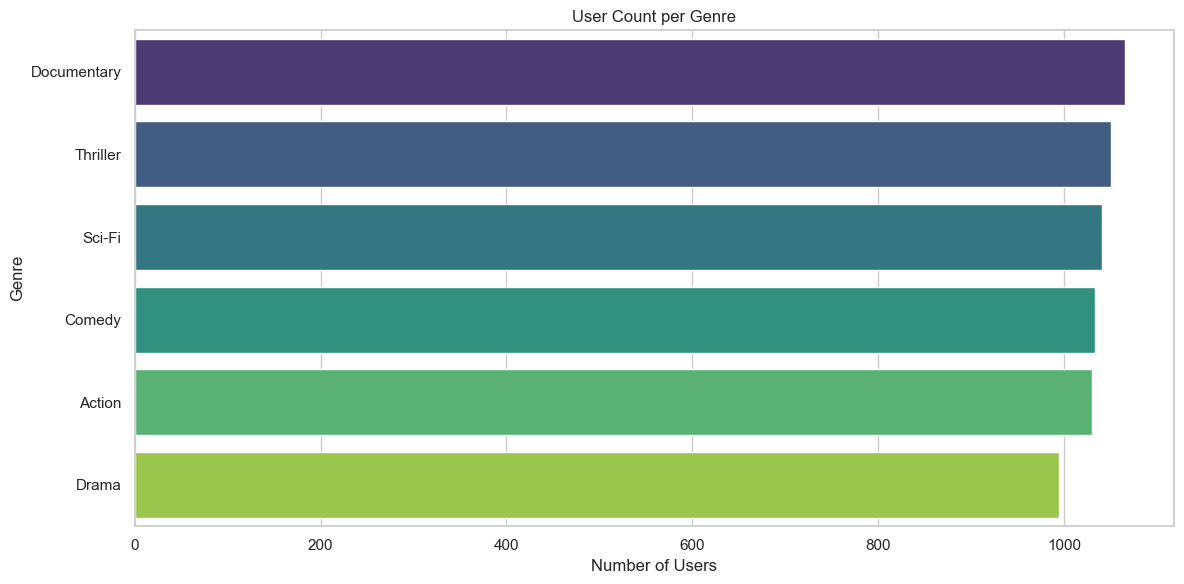

In [971]:
# Visualize the user count per genre
plt.figure(figsize=(12, 6))
sns.barplot(x='User_Count_per_Genre', y='Genre', data=user_count_per_genre_sorted, palette='viridis')
plt.title('User Count per Genre')
plt.xlabel('Number of Users')
plt.ylabel('Genre')
plt.tight_layout()  # Ensure everything fits well within the figure area
plt.show()

- Diverse Interests: The data shows a broad spectrum of interests among users, with substantial engagement across various genres, from educational documentaries to high-stakes thrillers and sci-fi adventures.

- Content Strategy Implications: The high user counts in these genres suggest areas where the streaming service can continue to invest in and expand its content library to retain and attract viewers.

- Potential for Niche Content: While genres like Drama are less popular compared to the top genres, they still have a considerable user base, indicating potential for targeted content offerings to cater to specific audience segments.

##### Age

In [972]:
streaming['Age'].nunique()

61

In [973]:
streaming['Age'].unique()

array([56, 52, 14, 36, 31, 53, 10, 28, 41, 40, 58, 66, 57, 43, 67, 46, 27,
       62, 42, 24, 64, 68, 60, 37, 45, 26, 18, 15, 25, 32, 54, 17, 22, 34,
       39, 59, 38, 44, 61, 51, 33, 12, 70, 65, 63, 29, 23, 21, 55, 13, 49,
       11, 48, 30, 16, 20, 50, 69, 47, 19, 35], dtype=int64)

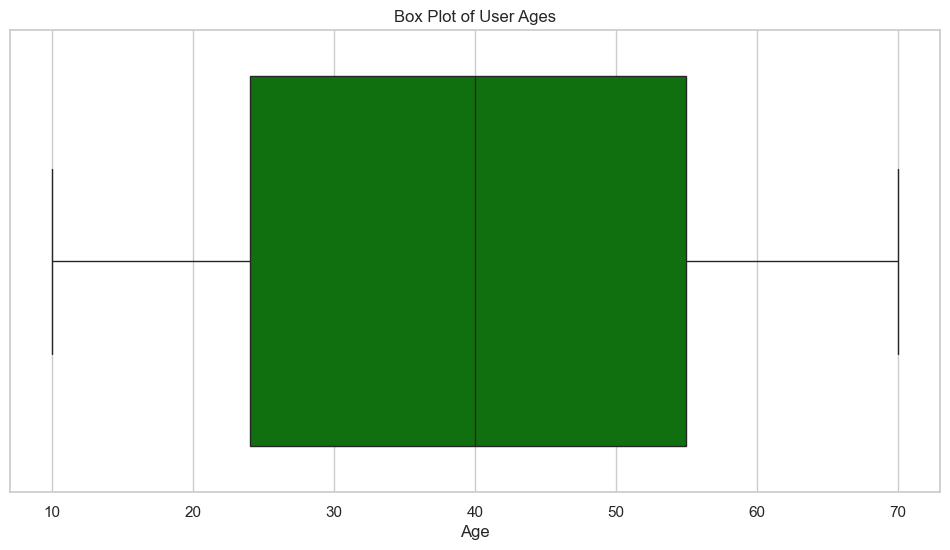

In [974]:
# Alternatively, you can use a box plot to visualize the age distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x=streaming['Age'], color='green')
plt.title('Box Plot of User Ages')
plt.xlabel('Age')
plt.show()

- Broad Age Appeal: The platform attracts users from a wide range of ages, from young teenagers (10 years old) to older adults (70 years old). This suggests that the content is appealing to a diverse audience. Additionally, the ages are spread evenly from the minimum to the maximum value, with no significant outliers pulling the distribution to either side.

- Peaks in Certain Age Groups: The median age of the audience is 40 years old. The Interquartile Range (IQR) stretches from 25 to 55 years, placing the middle 50% of the data within this span. Young Adults (20-35 years) and Mid-Age Users (35-50 years) constitute the most significant portions of the user base. These age groups are typically tech-savvy and likely to engage with streaming services frequently. This demographic likely includes working professionals and parents who contribute significantly to the viewership.

- Symmetry and Skewness: The position of the median within the box and the roughly equal length of the whiskers indicate that the data has a symmetrical distribution. The data is evenly spread around the median, indicating that there is no significant skew towards younger or older users.

##### Gender

In [975]:
streaming['Gender'].nunique()

2

In [976]:
streaming['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [977]:
# Group by Gender and count unique User_IDs
gender_user_counts = streaming.groupby('Gender')['User_ID'].nunique().reset_index()

# Rename columns for clarity
gender_user_counts.columns = ['Gender', 'User_Count_per_Gender']

# Display the user count for each gender
print("User count by gender:")
gender_user_counts

User count by gender:


,Gender,User_Count_per_Gender
0,Female,3148
1,Male,3066


The streaming platform has a nearly balanced gender distribution among its users, with a slight majority of female users. This indicates that the content and services provided by the platform appeal to both genders almost equally, suggesting a diverse and inclusive user base.

##### Subscription_Status

In [978]:
streaming['Subscription_Status'].nunique()

2

In [979]:
streaming['Subscription_Status'].unique()

array(['Premium', 'Free'], dtype=object)

In [980]:
# Group by Subscription_Status and count unique User_IDs
subscription_user_counts = streaming.groupby('Subscription_Status')['User_ID'].nunique().reset_index()

# Rename columns for clarity
subscription_user_counts.columns = ['Subscription_Status', 'User_Count_per_Subscription']

# Display the user count for each subscription status
print("User count by subscription status:")
subscription_user_counts

User count by subscription status:


,Subscription_Status,User_Count_per_Subscription
0,Free,3111
1,Premium,3103


The streaming platform has an almost equal distribution of free and premium users, indicating a balanced appeal to both non-paying and paying users. This suggests that the platform successfully caters to a wide audience, offering valuable content and services for both free and premium users. ​

##### Ratings

In [981]:
streaming['Ratings'].nunique()

5

In [982]:
streaming['Ratings'].unique()

array([3, 2, 4, 1, 5], dtype=int64)

In [983]:
# Group by Ratings and count the number of Video_IDs for each rating
ratings_video_count = streaming.groupby('Ratings')['Video_ID'].count().reset_index()

# Rename columns for clarity
ratings_video_count.columns = ['Ratings', 'Video_Count']

# Sort by Video_Count in descending order
ratings_video_count_sorted = ratings_video_count.sort_values(by='Video_Count', ascending=False)

# Display the sorted ratings by video count
print("Ratings sorted by video count:")
ratings_video_count_sorted

Ratings sorted by video count:


,Ratings,Video_Count
2,3,1301
1,2,1242
0,1,1237
3,4,1230
4,5,1204


The majority of videos have a rating of 3, followed by ratings 2 and 1. Higher ratings of 4 and 5 have slightly fewer videos, indicating that while there is a distribution across all ratings, the middle rating (3) is the most common. This suggests that user satisfaction is generally moderate, with a significant portion of content receiving average ratings. 

*Premium Users*

In [984]:
# Filter the dataset for Premium users
premium_users = streaming[streaming['Subscription_Status'] == 'Premium']

# Group by Ratings and count the number of Video_IDs for each rating
premium_ratings_count = premium_users.groupby('Ratings')['Video_ID'].count().reset_index()

# Rename columns for clarity
premium_ratings_count.columns = ['Ratings', 'Video_Count']

# Sort by Video_Count in descending order
premium_ratings_count_sorted = premium_ratings_count.sort_values(by='Video_Count', ascending=False)

# Display the sorted ratings by video count for Premium users
print("Premium users' ratings sorted by video count:")
premium_ratings_count_sorted

Premium users' ratings sorted by video count:


,Ratings,Video_Count
3,4,655
2,3,636
1,2,624
0,1,621
4,5,567


Premium users tend to rate videos slightly higher on average, with the most common rating being 4. This suggests that Premium users generally have a positive experience with the content, as indicated by the higher frequency of 4-star ratings. However, there is still a significant number of videos rated 3, 2, and 1, indicating that not all content meets the high expectations of Premium users. The least common rating is 5, suggesting that while Premium users appreciate the content, there is room for improvement to achieve the highest level of satisfaction.

*Free users*

In [985]:
# Filter the dataset for Free users
free_users = streaming[streaming['Subscription_Status'] == 'Free']

# Group by Ratings and count the number of Video_IDs for each rating
free_ratings_count = free_users.groupby('Ratings')['Video_ID'].count().reset_index()

# Rename columns for clarity
free_ratings_count.columns = ['Ratings', 'Video_Count']

# Sort by Video_Count in descending order
free_ratings_count_sorted = free_ratings_count.sort_values(by='Video_Count', ascending=False)

# Display the sorted ratings by video count for Free users
print("Free users' ratings sorted by video count:")
free_ratings_count_sorted

Free users' ratings sorted by video count:


,Ratings,Video_Count
2,3,665
4,5,637
1,2,618
0,1,616
3,4,575


Free users tend to give a balanced range of ratings, with the most common rating being 3. Interestingly, the highest rating (5) is also frequently given by Free users, indicating that many find the content highly satisfactory. However, there is still a substantial number of lower ratings (2 and 1), suggesting mixed experiences. The relatively lower frequency of 4-star ratings compared to 5-star ratings indicates that Free users might have polarized opinions about the content, either finding it excellent or mediocre.

*Comparison between Premium and Free Users*

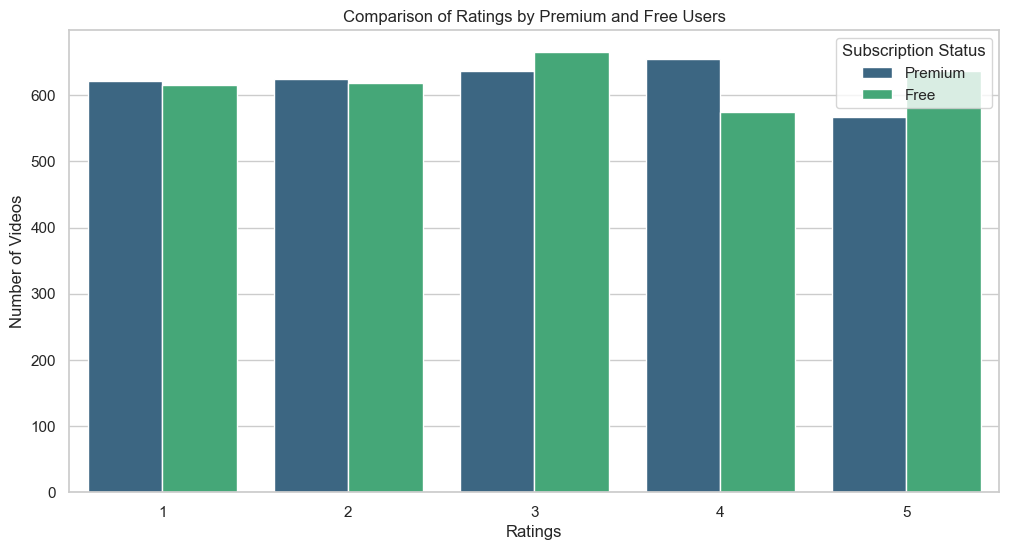

In [986]:
# Combine the data
premium_ratings_count_sorted['Subscription_Status'] = 'Premium'
free_ratings_count_sorted['Subscription_Status'] = 'Free'
combined_ratings_count = pd.concat([premium_ratings_count_sorted, free_ratings_count_sorted])

# Plot the grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Ratings', y='Video_Count', hue='Subscription_Status', data=combined_ratings_count, palette='viridis')
plt.title('Comparison of Ratings by Premium and Free Users')
plt.xlabel('Ratings')
plt.ylabel('Number of Videos')
plt.legend(title='Subscription Status')
plt.show()

- Higher Positive Ratings: Premium users most commonly rate videos at 4, while Free users most commonly rate videos at 3.

- Balanced Feedback: Free users provide a more balanced range of ratings, including a significant number of 5-star ratings, indicating high satisfaction.

- Polarization: Free users seem to have more polarized views, with high counts for both the highest and lower ratings, unlike Premium users who tend to give more moderate ratings (4).

##### Languages

In [987]:
streaming['Languages'].nunique()

5

In [988]:
streaming['Languages'].unique()

array(['Spanish', 'Chinese', 'German', 'French', 'English'], dtype=object)

In [989]:
# Group by Languages and count unique User_IDs
language_user_counts = streaming.groupby('Languages')['User_ID'].nunique().reset_index()

# Rename columns for clarity
language_user_counts.columns = ['Languages', 'User_Count_Languages']

# Sort by User_Count in descending order
language_user_counts_sorted = language_user_counts.sort_values(by='User_Count_Languages', ascending=False)

# Display the user count for each language
print("User count by language:")
language_user_counts_sorted

User count by language:


,Languages,User_Count_Languages
1,English,1313
0,Chinese,1264
3,German,1257
4,Spanish,1196
2,French,1184


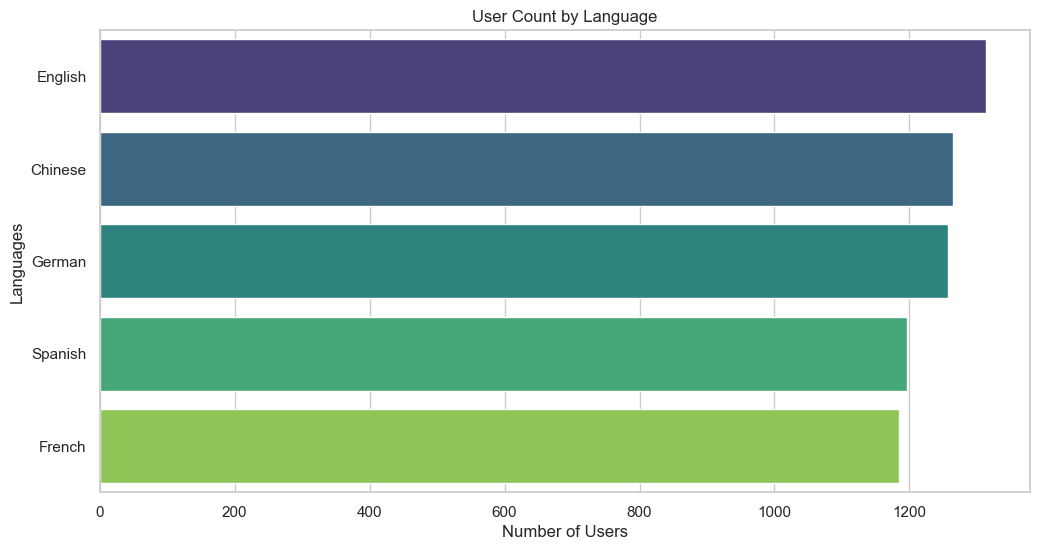

In [990]:
# Visualize the user count by language
plt.figure(figsize=(12, 6))
sns.barplot(x='User_Count_Languages', y='Languages', data=language_user_counts_sorted, palette='viridis')
plt.title('User Count by Language')
plt.xlabel('Number of Users')
plt.ylabel('Languages')
plt.show()

- The platform has a diverse user base with a significant number of users speaking English, Chinese, German, Spanish, and French.   This diversity suggests that the platform's content and services appeal to a wide range of linguistic groups, highlighting the importance of offering multilingual support and content to cater to all users effectively.

- English is the Most Common Language: With 1,313 users, English is the most commonly spoken language among the users.

##### Device_Type

In [991]:
streaming['Device_Type'].nunique()

5

In [992]:
streaming['Device_Type'].unique()

array(['Smartphone', 'Desktop', 'Tablet', 'Laptop', 'Smart TV'],
      dtype=object)

In [993]:
# Group by Device_Type and count unique User_IDs
device_type_user_counts = streaming.groupby('Device_Type')['User_ID'].nunique().reset_index()

# Rename columns for clarity
device_type_user_counts.columns = ['Device_Type', 'User_Count_by_Device']

# Sort by User_Count in descending order
device_type_user_counts_sorted = device_type_user_counts.sort_values(by='User_Count_by_Device', ascending=False)

# Display the user count for each device type
print("User count by device type:")
device_type_user_counts_sorted

User count by device type:


,Device_Type,User_Count_by_Device
2,Smart TV,1306
0,Desktop,1270
3,Smartphone,1233
4,Tablet,1217
1,Laptop,1188


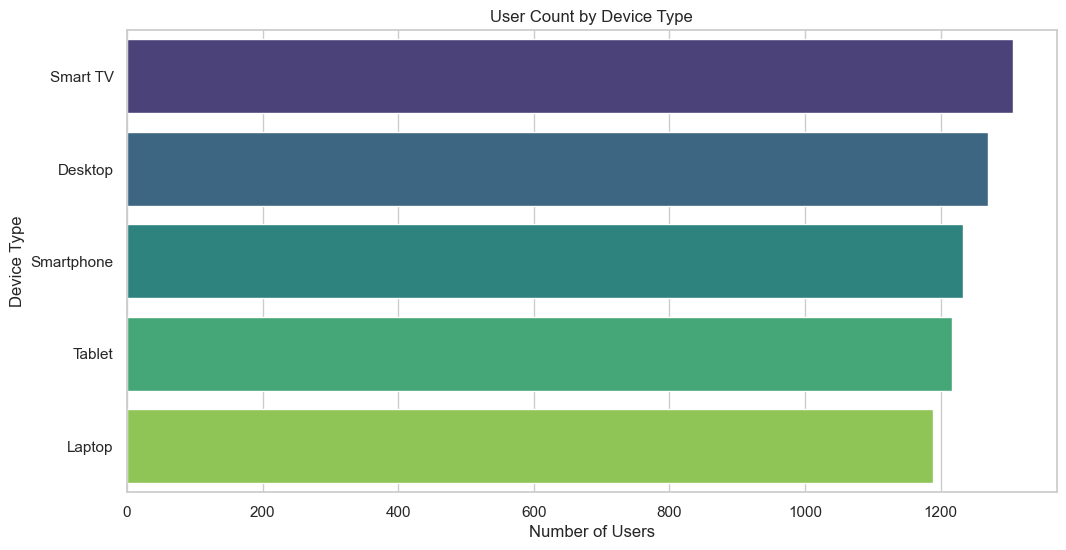

In [994]:
# Visualize the user count by device type
plt.figure(figsize=(12, 6))
sns.barplot(x='User_Count_by_Device', y='Device_Type', data=device_type_user_counts_sorted, palette='viridis')
plt.title('User Count by Device Type')
plt.xlabel('Number of Users')
plt.ylabel('Device Type')
plt.show()

Smart TVs and Desktops are the most common devices used by the platform's users, followed closely by Smartphones, Tablets, and Laptops. This suggests that the platform is accessed on a variety of devices, with a slight preference for Smart TVs and Desktops. Ensuring a seamless user experience across these devices is crucial for maintaining user satisfaction and engagement. 

##### Location

In [995]:
streaming['Location'].nunique()

5169

In [996]:
streaming['Location'].unique()

array(['Reedshire', 'Stevenhaven', 'Vaughntown', ..., 'Lake Michealton',
       'Lloydland', 'Timothystad'], dtype=object)

In [997]:
# Group by Location and count unique User_IDs
location_user_counts = streaming.groupby('Location')['User_ID'].nunique().reset_index()

# Rename columns for clarity
location_user_counts.columns = ['Location', 'User_Count_byLocation']

# Sort by User_Count in descending order
location_user_counts_sorted = location_user_counts.sort_values(by='User_Count_byLocation', ascending=False).head(10)  # Display top 10 locations

# Display the user count for each location
print("User count by location (Top 10):")
location_user_counts_sorted

User count by location (Top 10):


,Location,User_Count_byLocation
916,East Michael,7
2674,New John,7
4043,Scottton,6
3688,Port Michael,6
4206,South Daniel,6
3525,Port David,6
1808,Lake Christopher,6
3047,North Jessica,6
2687,New Joseph,6
3799,Port William,6


There are numerous locations in the dataset (5,169), but the granularity of users per location is quite low, with the top locations having only 7 users each. Since the location data does not include city or country information, classifying and utilizing this information effectively will be very difficult.

##### Playback_Quality

In [998]:
streaming['Playback_Quality'].nunique()

3

In [999]:
streaming['Playback_Quality'].unique()

array(['4K', 'SD', 'HD'], dtype=object)

In [1000]:
# Create a cross-tabulation of Device_Type and Playback_Quality
device_playback_quality = pd.crosstab(streaming['Device_Type'], streaming['Playback_Quality'])

# Display the cross-tabulation
print("Cross-tabulation of Device_Type and Playback_Quality:")
device_playback_quality

Cross-tabulation of Device_Type and Playback_Quality:


Playback_Quality,4K,HD,SD
Device_Type,,,
Desktop,407,441,422
Laptop,409,404,375
Smart TV,450,409,447
Smartphone,407,406,420
Tablet,419,396,402


- Smart TVs Lead in 4K Playback:
    Smart TVs have the highest number of 4K playback instances (450), suggesting they are the preferred device for high-quality streaming.

- Balanced HD Playback Across Devices:
    HD playback is relatively balanced across all device types, with Desktop (441) having the highest and Tablet (396) having the lowest.

- SD Playback Preference:
    Smart TVs (447) and Desktops (422) show higher SD playback instances, indicating some users still opt for lower quality streaming on these devices.

- Smartphone and Tablet Usage:
    Smartphones and Tablets have a more balanced distribution across all playback qualities, with a slight preference for 4K and SD over HD.

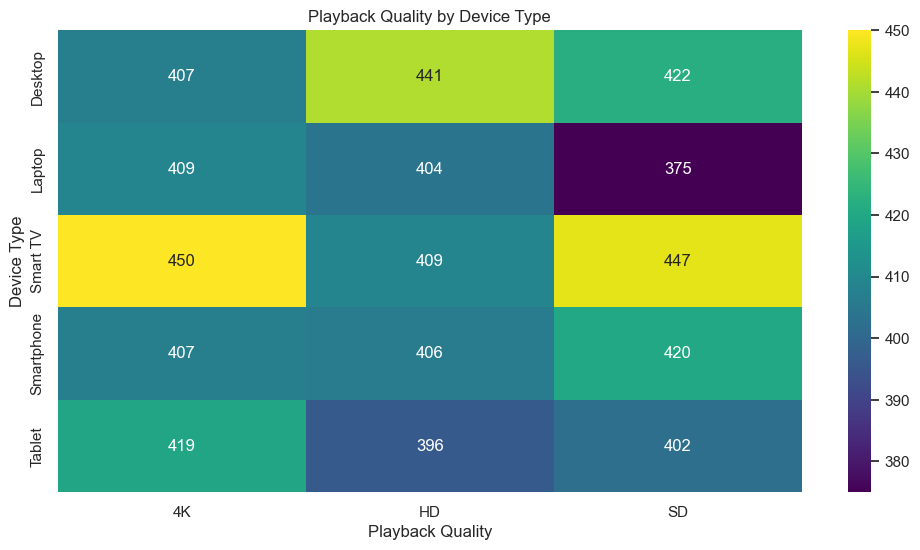

In [1001]:
# Visualize the data using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(device_playback_quality, annot=True, fmt='d', cmap='viridis')
plt.title('Playback Quality by Device Type')
plt.xlabel('Playback Quality')
plt.ylabel('Device Type')
plt.show()

- High-Quality Streaming: Smart TVs are the primary choice for 4K streaming, highlighting their suitability for high-quality content consumption.

- Versatile Devices: Desktops and Laptops support all playback qualities well, showing versatility in usage.

- Mobile Devices: Smartphones and Tablets are used almost equally across different playback qualities, indicating flexible usage patterns.

##### Interaction_Events

In [1002]:
streaming['Interaction_Events'].nunique()

101

In [1003]:
# Identify unique interaction events
unique_interaction_events = streaming['Interaction_Events'].unique()
print("Unique interaction events:")
print(unique_interaction_events)

# Count the number of each type of interaction event
interaction_event_counts = streaming['Interaction_Events'].value_counts().reset_index()
interaction_event_counts.columns = ['Interaction_Event', 'Interactions_Count']

# Display the counts
print("Interaction event counts:")
interaction_event_counts

Unique interaction events:
[ 73  22  41  40  76  26  82  79  19  52  62  63  81  78  27  70  24  47
  64  99  34  86  50  55  89  56  83  66  17  68  11  65  54   1  31  80
  43  29  92  42  59  10  20   6  91  93  84   8  39  48  51  98  28  77
  25  97  94  30  61  96   5   2  21   0  15  85  37   3   9  74 100  69
  38  12  88  14  45  90  67  18  35  60  44  53  33  75  95  36  23  49
  57   7  16  71  46  58  72  87  13  32   4]
Interaction event counts:


,Interaction_Event,Interactions_Count
0,44,80
1,7,80
2,51,78
3,3,74
4,47,74
...,...,...
96,17,46
97,38,45
98,4,45
99,89,43


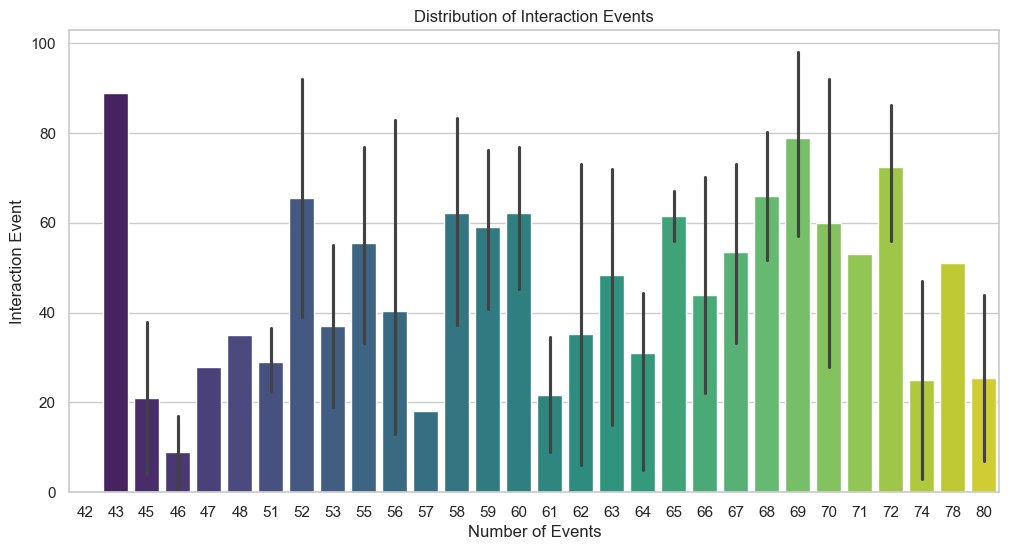

In [1004]:
# Visualize the interaction event counts
plt.figure(figsize=(12, 6))
sns.barplot(x='Interactions_Count', y='Interaction_Event', data=interaction_event_counts, palette='viridis')
plt.title('Distribution of Interaction Events')
plt.xlabel('Number of Events')
plt.ylabel('Interaction Event')
plt.show()

The analysis of interaction events reveals diverse user engagement patterns on the platform. The most common interaction events highlight key user behaviors, while less frequent events suggest areas for potential improvement. Understanding these patterns is crucial for optimizing user experience and increasing engagement on the platform.

In [1005]:
# Create a cross-tabulation of Device_Type and Interaction_Events
device_interaction_events = pd.crosstab(streaming['Device_Type'], streaming['Interaction_Events'])

# Add a column for the total interaction events per device type
device_interaction_events['Total_Events'] = device_interaction_events.sum(axis=1)

# Sort the DataFrame by the total interaction events
device_interaction_events_sorted = device_interaction_events.sort_values(by='Total_Events', ascending=False)

# Display the cross-tabulation
print("Sorted cross-tabulation of Device_Type and Interaction_Events:")
device_interaction_events_sorted

Sorted cross-tabulation of Device_Type and Interaction_Events:


Interaction_Events,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,Total_Events
Device_Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Smart TV,9,11,13,18,8,16,12,12,15,15,17,11,17,15,19,10,12,8,12,13,14,16,16,9,14,12,10,12,8,15,8,11,11,15,11,10,10,14,9,10,13,10,13,15,14,10,18,22,12,10,15,14,13,15,13,10,18,17,12,14,11,13,13,14,13,14,16,9,15,14,16,20,13,10,18,18,11,16,7,12,14,13,14,10,10,11,10,12,10,10,17,19,17,10,9,12,11,13,13,11,11,1306
Desktop,9,8,15,8,14,14,15,16,7,10,16,9,15,13,12,19,13,11,15,10,9,12,12,14,8,10,21,12,8,13,13,12,12,11,16,9,6,8,9,8,17,7,13,14,25,16,10,12,13,16,11,16,12,15,17,12,9,13,15,20,11,13,8,12,14,10,11,14,12,8,19,14,14,17,15,11,15,8,18,17,11,12,13,11,16,10,17,16,13,8,8,19,7,15,11,13,10,13,11,8,12,1270
Smartphone,6,9,15,20,8,15,10,17,15,12,9,12,10,10,19,14,12,8,15,10,13,8,7,5,12,12,13,13,9,15,12,14,13,12,10,12,19,9,8,12,10,8,12,12,14,13,7,17,16,18,9,13,13,13,10,12,13,20,16,13,11,9,13,7,7,11,17,18,15,9,11,12,13,12,15,9,12,18,15,13,16,13,10,10,10,16,8,10,11,10,15,9,7,13,11,9,13,13,14,16,19,1233
Tablet,8,8,7,13,11,8,8,20,7,8,15,15,12,9,9,11,10,12,9,9,9,17,7,11,16,11,9,11,12,13,8,13,18,12,11,7,14,9,10,15,16,12,15,14,16,14,11,10,13,9,15,17,8,17,13,14,11,10,5,15,13,10,9,10,16,12,13,14,14,17,9,15,13,12,6,10,13,15,8,14,13,16,15,15,12,13,10,8,19,7,9,11,10,12,15,17,11,19,14,18,13,1217
Laptop,10,10,11,15,4,11,17,15,14,14,13,13,12,9,7,9,14,7,6,11,13,14,9,12,5,11,17,14,10,11,10,16,14,11,11,10,12,13,9,7,16,14,7,9,11,11,14,13,12,15,9,18,9,11,6,5,14,9,15,4,22,10,16,17,10,11,10,10,14,12,13,11,10,11,13,10,17,10,12,16,14,18,17,10,11,5,14,12,5,8,11,14,11,8,13,17,15,12,17,17,11,1188


- Smartphones Lead in Interaction:
    Smartphones have the highest total number of interaction events, indicating they are the most actively used devices for interacting with the platform.

- High Engagement on Tablets and Desktops:
    Tablets and Desktops also show a high number of interaction events, suggesting significant user engagement on these devices as well.

- Balanced Usage of Smart TVs and Laptops:
    Smart TVs and Laptops have a balanced distribution of interaction events, reflecting their consistent usage across different types of interactions.

- Diverse Interaction Patterns:
    While the total number of interactions varies, all device types support a wide range of interaction events, showing the platform's versatility in catering to different user behaviors.

### Key Insights

- Nonexistent multiple session IDs: There are no users with multiple sessions, as the User_ID and Session_ID are in a one-to-one relationship.

- Device sharing patterns by mainly small groups: While some devices are highly shared (up to 16 users), the most common pattern is small group sharing, with most devices being shared by 6 users. Additionally, a minority of devices are used exclusively by a single user, highlighting a mix of communal and personal usage.

- There are exactly 100 distinct videos available in the streaming app, possibly representing the most-watched content on the platform.

- The top 10 most-watched videos each have more than 70 distinct users, with Video_ID 40 being the most popular at 79 users. In contrast, the bottom 10 least-watched videos have around 50 distinct users each, with Video_ID 39 being the least popular at 46 users.

- The data reveals a wide range of video-watching durations, from just a few seconds to nearly two hours. The distribution is skewed towards shorter viewing times, indicating that most users engage with shorter videos or only part of longer content. However, some users still watch videos for extended periods, likely consuming full-length content such as movies or documentaries.

- The streaming platform attracts a diverse and balanced audience, with users aged 10 to 70. The median age is 40, and the central 50% of users are between 25 and 55. Young adults (20-35) and mid-age users (35-50) are the core demographics, indicating the platform's content appeals broadly across age groups.

- The streaming platform has a nearly balanced gender distribution, with 3,148 female users and 3,066 male users, indicating broad appeal to both genders.

- The streaming platform has an almost equal distribution of free (3,111 users) and premium (3,103 users) accounts, indicating balanced appeal to both non-paying and paying users.

- Premium users tend to rate videos more favorably, with a significant number of 4-star ratings. Free users display more polarized opinions, with many videos rated both very highly (5) and very low (1).

- The platform has a diverse user base, with the most common languages being English (1,313 users), Chinese (1,264 users), German (1,257 users), Spanish (1,196 users), and French (1,184 users). This highlights the importance of offering multilingual support and content to cater to a wide range of users.

- Users primarily access the platform via Smart TVs (1,306 users) and Desktops (1,270 users), followed by Smartphones, Tablets, and Laptops. Ensuring a seamless experience across these devices is crucial for user satisfaction and engagement.

- Smart TVs are the preferred device for 4K streaming, while Desktops and Laptops support a balanced distribution of playback qualities, indicating their versatility. Mobile devices (Smartphones and Tablets) show flexible usage patterns with a nearly equal distribution across all playback qualities. This highlights the importance of optimizing content delivery for high-quality streaming on Smart TVs and maintaining versatile playback options for other devices.

- Smartphones have the highest interaction events, followed by Tablets and Desktops, indicating their active use. Smart TVs and Laptops show consistent interaction patterns. Optimizing the user experience on these devices is crucial for maintaining high engagement levels.

#### To explore

- Video_ID:
    - Analyze Viewing Patterns: Investigate the distribution of viewing durations to identify common viewing patterns and understand typical user engagement.
    - Identify High Engagement Content: Look into the videos associated with the maximum durations to learn what makes them engaging.
    - Consider Short Engagement: Understand why some users have very short engagement to improve content or user experience.

- Duration_Watched (minutes):
    - Explore specific videos with the shortest and longest durations to understand user behavior. (genre)
    - Optimization Opportunities: Analyzing why users disengage quickly could lead to improvements in content delivery, recommendations, or user interface design to increase watch time.

- Country:
    - Localization Opportunities: Consider language support, cultural preferences, and region-specific content to enhance user experiences in diverse locations.

- Age:
    - Potential Target Age Groups: Identifying the age groups with the highest frequencies can help in tailoring content and marketing strategies to the most engaged users. For example, if there are peaks around ages 20-30, it indicates a strong engagement from young adults.
    - User Experience Customization: Understanding the age distribution helps in designing a user interface that caters to different age groups. Younger users might prefer a more interactive and dynamic UI, while older users might appreciate a simpler, more intuitive design.
    - age in relevant groups

- Gender:
    - gender by genre

- subscription status
    - country
    - age group

- Languages:
    - country
    - age group

- Device:
    - by age group
    - by country
    - subscription

## 5. Feature Engineering

### Data Transformation

Let's adapt data into a format suitable for further analysis.

#### Index Column

As USER_ID and Session_ID are such a long extensive in character string, we will reemplace these with an index column 'ID'.

In [1006]:
streaming['ID'] = streaming.index
streaming.head()

,User_ID,Session_ID,Device_ID,Video_ID,Duration_Watched (minutes),Genre,Country,Age,Gender,Subscription_Status,Ratings,Languages,Device_Type,Location,Playback_Quality,Interaction_Events,ID
0,eb4f9229-74df-45f6-baac-cf19241b8b30,cb2142a7-0750-49ed-b8ac-a975fe1ff69a,232,11,90.044525,Sci-Fi,Sudan,56,Female,Premium,3,Spanish,Smartphone,Reedshire,4K,73,0
1,661d4b59-4328-410a-901c-1e3b4c40c334,3bc0a662-b353-4015-8b0c-55ceb510d13a,549,85,68.973479,Comedy,Cuba,52,Male,Premium,3,Chinese,Desktop,Stevenhaven,SD,22,1
2,dd3fe9e9-ea82-4891-ab93-8a47c80e3251,bd545b4a-9f54-4e87-b9f8-15ae20b44f22,844,50,42.511343,Comedy,Japan,14,Female,Premium,3,Spanish,Tablet,Vaughntown,HD,41,2
3,a1b3365b-1d00-4ddf-bc43-02fc9c10c680,0441086d-c59e-478d-a496-5c5b995ecfdb,201,38,53.316660,Documentary,Lao People's Democratic Republic,36,Male,Premium,2,Spanish,Laptop,East Raymondbury,SD,40,3
4,338d3f91-5f1c-4590-8803-324901826406,0295f01d-7f15-4799-856c-90c688697ef8,700,31,69.437786,Action,Bangladesh,31,Male,Premium,4,German,Laptop,Michaelchester,HD,41,4


In [1007]:
streaming.columns

Index(['User_ID', 'Session_ID', 'Device_ID', 'Video_ID',
       'Duration_Watched (minutes)', 'Genre', 'Country', 'Age', 'Gender',
       'Subscription_Status', 'Ratings', 'Languages', 'Device_Type',
       'Location', 'Playback_Quality', 'Interaction_Events', 'ID'],
      dtype='object')

In [1008]:
# List the columns in the desired order
columns_order = ['ID', 'User_ID', 'Country', 'Location', 'Age', 'Gender',
       'Subscription_Status', 'Device_ID', 'Device_Type', 'Session_ID',
       'Video_ID', 'Genre', 'Languages', 'Playback_Quality',
       'Duration_Watched (minutes)', 'Ratings', 'Interaction_Events']

# Reorder the columns
streaming = streaming[columns_order]

# Display the first few rows to verify the column order
streaming.head()

,ID,User_ID,Country,Location,Age,Gender,Subscription_Status,Device_ID,Device_Type,Session_ID,Video_ID,Genre,Languages,Playback_Quality,Duration_Watched (minutes),Ratings,Interaction_Events
0,0,eb4f9229-74df-45f6-baac-cf19241b8b30,Sudan,Reedshire,56,Female,Premium,232,Smartphone,cb2142a7-0750-49ed-b8ac-a975fe1ff69a,11,Sci-Fi,Spanish,4K,90.044525,3,73
1,1,661d4b59-4328-410a-901c-1e3b4c40c334,Cuba,Stevenhaven,52,Male,Premium,549,Desktop,3bc0a662-b353-4015-8b0c-55ceb510d13a,85,Comedy,Chinese,SD,68.973479,3,22
2,2,dd3fe9e9-ea82-4891-ab93-8a47c80e3251,Japan,Vaughntown,14,Female,Premium,844,Tablet,bd545b4a-9f54-4e87-b9f8-15ae20b44f22,50,Comedy,Spanish,HD,42.511343,3,41
3,3,a1b3365b-1d00-4ddf-bc43-02fc9c10c680,Lao People's Democratic Republic,East Raymondbury,36,Male,Premium,201,Laptop,0441086d-c59e-478d-a496-5c5b995ecfdb,38,Documentary,Spanish,SD,53.316660,2,40
4,4,338d3f91-5f1c-4590-8803-324901826406,Bangladesh,Michaelchester,31,Male,Premium,700,Laptop,0295f01d-7f15-4799-856c-90c688697ef8,31,Action,German,HD,69.437786,4,41


#### Country Standarization

Standardize Country Names: Let's adjust the country names to align with ISO standards for consistency and accuracy.

In [1009]:
# Create a mapping dictionary for non-matching countries
country_corrections_1 = {
    'Korea': 'South Korea',  # South Korea, officially the Republic of Korea
    "Lao People's Democratic Republic": 'Laos',
    'Macao': 'Macao SAR China',
    'Palestinian Territory': 'Palestine',
    'Saint Barthelemy': 'Saint Barthélemy',
    'United States of America': 'United States',
    'Russian Federation': 'Russia',
    'Libyan Arab Jamahiriya': 'Libya',
    'Cote d\'Ivoire': 'Ivory Coast',
    'Kyrgyz Republic': 'Kyrgyzstan',
    'Slovakia (Slovak Republic)': 'Slovakia',
    'Holy See (Vatican City State)': 'Vatican City',
    'British Virgin Islands': 'Virgin Islands, British',
    'United States Virgin Islands': 'Virgin Islands, U.S.',
    'Svalbard & Jan Mayen Islands': 'Svalbard and Jan Mayen',
    'Sao Tome and Principe': 'São Tomé and Príncipe',
    'Saint Martin': 'Sint Maarten',
    'Myanmar': 'Myanmar (Burma)',
    'Swaziland': 'Eswatini',
    'Heard Island and McDonald Islands': 'Heard Island and McDonald McDonald Islands',
    'Congo': 'Republic of the Congo',
    'Taiwan': 'Taiwan, Province of China',
    'Hong Kong': 'Hong Kong SAR China',
    'Netherlands Antilles': 'Curaçao',  # Netherlands Antilles dissolved, Curacao is one of the successor countries
    'Pitcairn Islands': 'Pitcairn',
    'Western Sahara': 'Sahrawi Arab Democratic Republic',
    'Brunei Darussalam': 'Brunei',
    'Czech Republic': 'Czechia',
    'Saint Kitts and Nevis': 'St Kitts & Nevis',
    'Cape Verde': 'Cabo Verde',
    'French Southern Territories': 'French Southern and Antarctic Lands',
    'Syrian Arab Republic': 'Syria',
    'Guinea-Bissau': 'Guinea Bissau',
    'South Korea': 'Korea, Republic of',
    'North Macedonia': 'Macedonia',
    'Reunion': 'Réunion',
    'Saint Helena': 'St. Helena',
    'Turks and Caicos Islands': 'Turks & Caicos Islands',
    'Wallis and Futuna': 'Wallis and Futuna Islands',
    'South Georgia and the South Sandwich Islands': 'South Georgia & South Sandwich Islands',
    'Antarctica (the territory South of 60 deg S)': 'Antarctica',
    'Saint Pierre and Miquelon': 'St Pierre & Miquelon',
    'Timor-Leste': 'East Timor',
    'Saint Vincent and the Grenadines': 'St Vincent & Grenadines',
    'Saint Lucia': 'St Lucia',
    'Northern Mariana Islands': 'Northern Mariana Islands, U.S.',
    'Cocos (Keeling) Islands': 'Cocos (Keeling) Islands',
    'Heard Island and McDonald McDonald Islands': 'Heard & McDonald Islands',
    'Gambia': 'The Gambia',
    'Faroe Islands': 'Faroe Islands',
    'Tokelau': 'Tokelau',
    'Bonaire, Sint Eustatius and Saba': 'Caribbean Netherlands',
    'St. Helena': 'Saint Helena, Ascension and Tristan da Cunha',
}

# Replace non-matching country names in the dataset
streaming['Country'] = streaming['Country'].replace(country_corrections_1)

# Extract the corrected unique country names
corrected_country_list = streaming['Country'].unique()

# Verify the corrections
iso_countries = {country.name for country in pycountry.countries}
non_iso_countries_after_correction = [country for country in corrected_country_list if country not in iso_countries]

# Display results
print("Corrected list of unique countries:")
print(corrected_country_list)

print("\nNumber of non-matching countries after correction:", len(non_iso_countries_after_correction))
print("Non-matching countries after correction:", non_iso_countries_after_correction)

Corrected list of unique countries:
['Sudan' 'Cuba' 'Japan' 'Laos' 'Bangladesh' 'Tokelau' 'Guyana' 'Guinea'
 'Palau' 'Ecuador' 'Iceland' 'Colombia' 'Dominican Republic' 'Georgia'
 'Malaysia' 'Togo' 'Iran' 'Estonia' 'South Korea' 'Lebanon'
 'Trinidad and Tobago' 'St Vincent & Grenadines' 'Belarus'
 'Northern Mariana Islands, U.S.' 'Jersey' 'Niue' 'Lesotho' 'Anguilla'
 'Romania' 'Uganda' 'Comoros' 'Austria' 'Paraguay' 'Angola' 'Philippines'
 'Cambodia' 'Benin' 'Yemen' 'Luxembourg' 'Malawi'
 'Heard Island and McDonald McDonald Islands' 'Wallis and Futuna Islands'
 'Macao SAR China' 'Honduras' 'Liechtenstein' 'Uruguay' 'Cameroon'
 'Cabo Verde' 'San Marino' 'Guadeloupe' 'Dominica' 'Egypt' 'Jamaica'
 'Portugal' 'French Polynesia' 'The Gambia' 'Niger' 'Fiji'
 'Virgin Islands, U.S.' 'Aruba' 'French Southern and Antarctic Lands'
 'China' 'Sweden' 'Ivory Coast' 'Saudi Arabia' 'Croatia' 'Barbados'
 'Turkmenistan' 'Falkland Islands (Malvinas)' 'Sierra Leone' 'Venezuela'
 'South Africa' 'Denmark' '

In [1010]:
# Updated mapping dictionary for non-matching countries
country_corrections_2 = {
    'Laos': 'Lao People\'s Democratic Republic',
    'Iran': 'Iran, Islamic Republic of',
    'St Vincent & Grenadines': 'Saint Vincent and the Grenadines',
    'Northern Mariana Islands, U.S.': 'Northern Mariana Islands',
    'Heard & McDonald Islands': 'Heard Island and McDonald Islands',
    'Wallis and Futuna Islands': 'Wallis and Futuna',
    'Macao SAR China': 'Macao',
    'The Gambia': 'Gambia',
    'French Southern and Antarctic Lands': 'French Southern Territories',
    'Ivory Coast': 'Côte d\'Ivoire',
    'Venezuela': 'Venezuela, Bolivarian Republic of',
    'Tanzania': 'Tanzania, United Republic of',
    'Bolivia': 'Bolivia, Plurinational State of',
    'South Georgia & South Sandwich Islands': 'South Georgia and the South Sandwich Islands',
    'Brunei': 'Brunei Darussalam',
    'Palestine': 'Palestine, State of',
    'Macedonia': 'North Macedonia',
    'Hong Kong SAR China': 'Hong Kong',
    'St Lucia': 'Saint Lucia',
    'São Tomé and Príncipe': 'Sao Tome and Principe',
    'Turkey': 'Türkiye',
    'Turks & Caicos Islands': 'Turks and Caicos Islands',
    'St Kitts & Nevis': 'Saint Kitts and Nevis',
    'Republic of the Congo': 'Congo',
    'Myanmar (Burma)': 'Myanmar',
    'Syria': 'Syrian Arab Republic',
    'Sint Maarten': 'Saint Martin (French part)',
    'British Indian Ocean Territory (Chagos Archipelago)': 'British Indian Ocean Territory',
    'Bouvet Island (Bouvetoya)': 'Bouvet Island',
    'St Pierre & Miquelon': 'Saint Pierre and Miquelon',
    'Micronesia': 'Micronesia, Federated States of',
    'Vietnam': 'Viet Nam',
    'Sahrawi Arab Democratic Republic': 'Western Sahara',
    'Vatican City': 'Holy See (Vatican City State)',
    'East Timor': 'Timor-Leste',
    'Russia': 'Russian Federation',
    'Moldova': 'Moldova, Republic of',
    'Guinea Bissau': 'Guinea-Bissau'
}

# Replace non-matching country names with their ISO standard equivalents
streaming['Country'] = streaming['Country'].replace(country_corrections_2)

# Verify the corrections
corrected_unique_countries = streaming['Country'].unique()

# Check how many are still not matching
iso_countries = {country.name for country in pycountry.countries}
non_iso_countries_after_correction = [country for country in corrected_unique_countries if country not in iso_countries]

# Display results
print("Corrected list of unique countries:")
print(corrected_unique_countries)

print("\nNumber of non-matching countries after correction:", len(non_iso_countries_after_correction))
print("Non-matching countries after correction:", non_iso_countries_after_correction)

Corrected list of unique countries:
['Sudan' 'Cuba' 'Japan' "Lao People's Democratic Republic" 'Bangladesh'
 'Tokelau' 'Guyana' 'Guinea' 'Palau' 'Ecuador' 'Iceland' 'Colombia'
 'Dominican Republic' 'Georgia' 'Malaysia' 'Togo'
 'Iran, Islamic Republic of' 'Estonia' 'South Korea' 'Lebanon'
 'Trinidad and Tobago' 'Saint Vincent and the Grenadines' 'Belarus'
 'Northern Mariana Islands' 'Jersey' 'Niue' 'Lesotho' 'Anguilla' 'Romania'
 'Uganda' 'Comoros' 'Austria' 'Paraguay' 'Angola' 'Philippines' 'Cambodia'
 'Benin' 'Yemen' 'Luxembourg' 'Malawi'
 'Heard Island and McDonald McDonald Islands' 'Wallis and Futuna' 'Macao'
 'Honduras' 'Liechtenstein' 'Uruguay' 'Cameroon' 'Cabo Verde' 'San Marino'
 'Guadeloupe' 'Dominica' 'Egypt' 'Jamaica' 'Portugal' 'French Polynesia'
 'Gambia' 'Niger' 'Fiji' 'Virgin Islands, U.S.' 'Aruba'
 'French Southern Territories' 'China' 'Sweden' "Côte d'Ivoire"
 'Saudi Arabia' 'Croatia' 'Barbados' 'Turkmenistan'
 'Falkland Islands (Malvinas)' 'Sierra Leone'
 'Venezuela, B

In [1011]:
# Updated mapping dictionary for remaining non-matching countries
country_corrections_3 = {
    'South Korea': 'Korea, Republic of',
    'Heard Island and McDonald McDonald Islands': 'Heard Island and McDonald Islands',
    'St. Helena': 'Saint Helena, Ascension and Tristan da Cunha',
}

# Replace non-matching country names with their ISO standard equivalents
streaming['Country'] = streaming['Country'].replace(country_corrections_3)

# Verify the corrections
corrected_unique_countries = streaming['Country'].unique()

# Check how many are still not matching
iso_countries = {country.name for country in pycountry.countries}
non_iso_countries_after_correction = [country for country in corrected_unique_countries if country not in iso_countries]

# Display results
corrected_unique_countries, len(non_iso_countries_after_correction), non_iso_countries_after_correction

(array(['Sudan', 'Cuba', 'Japan', "Lao People's Democratic Republic",
        'Bangladesh', 'Tokelau', 'Guyana', 'Guinea', 'Palau', 'Ecuador',
        'Iceland', 'Colombia', 'Dominican Republic', 'Georgia', 'Malaysia',
        'Togo', 'Iran, Islamic Republic of', 'Estonia',
        'Korea, Republic of', 'Lebanon', 'Trinidad and Tobago',
        'Saint Vincent and the Grenadines', 'Belarus',
        'Northern Mariana Islands', 'Jersey', 'Niue', 'Lesotho',
        'Anguilla', 'Romania', 'Uganda', 'Comoros', 'Austria', 'Paraguay',
        'Angola', 'Philippines', 'Cambodia', 'Benin', 'Yemen',
        'Luxembourg', 'Malawi', 'Heard Island and McDonald Islands',
        'Wallis and Futuna', 'Macao', 'Honduras', 'Liechtenstein',
        'Uruguay', 'Cameroon', 'Cabo Verde', 'San Marino', 'Guadeloupe',
        'Dominica', 'Egypt', 'Jamaica', 'Portugal', 'French Polynesia',
        'Gambia', 'Niger', 'Fiji', 'Virgin Islands, U.S.', 'Aruba',
        'French Southern Territories', 'China', 'Swede

The number of non-matching countries is now zero, aligning the 'Country' column data with the ISO 3166 standard.

##### Visualization for Country

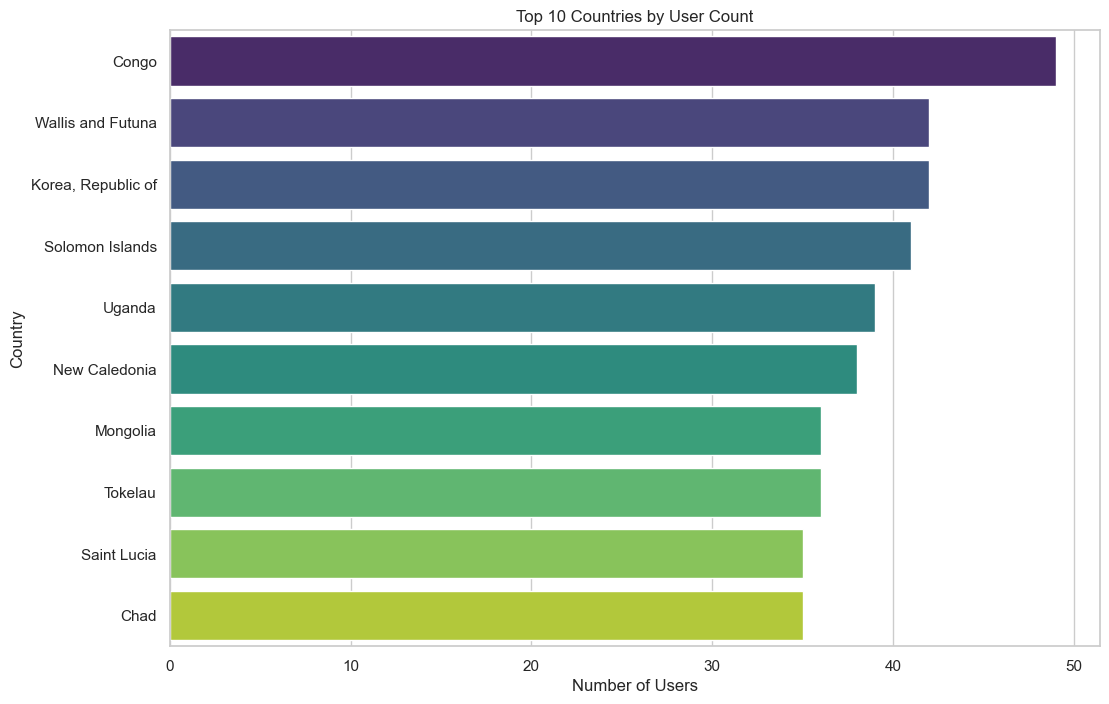

In [1012]:
# Count the number of users per country
country_user_counts = streaming['Country'].value_counts().reset_index()
country_user_counts.columns = ['Country', 'User_ID']

# Bar plot for User Count by Country
plt.figure(figsize=(12, 8))
sns.barplot(x='User_ID', y='Country', data=country_user_counts.head(10), palette='viridis')
plt.title('Top 10 Countries by User Count')
plt.xlabel('Number of Users')
plt.ylabel('Country')
plt.show()

Country is group by counts of the unique User_IDs to determine user counts per country. The bar plot is used to display the top 10 countries with the highest number of users.

In [1013]:
# Choropleth map for User Count by Country
fig = px.choropleth(
    country_user_counts,
    locations='Country',
    locationmode='country names',
    color='User_ID',
    hover_name='Country',
    color_continuous_scale='Blues',
    title='User Count by Country'
)
fig.show()

This approach provides a geographical representation of user distribution, the map shows a color-coded representation of user counts, highlighting regions with the most users.

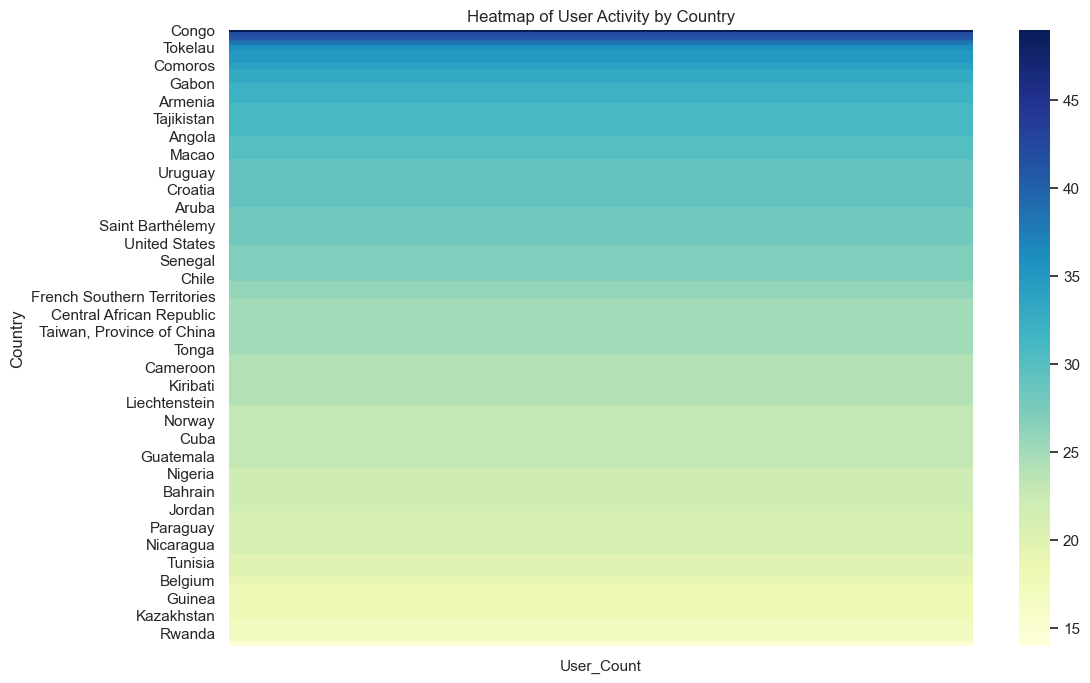

In [1014]:
# Calculate user counts per country
country_activity = streaming['Country'].value_counts().reset_index()
country_activity.columns = ['Country', 'User_Count']

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(country_activity.pivot_table(index='Country', values='User_Count', fill_value=0).sort_values(by='User_Count', ascending=False), cmap='YlGnBu', annot=False)
plt.title('Heatmap of User Activity by Country')
plt.ylabel('Country')
plt.show()

Heatmap: This visualization shows the intensity of user activity across different countries.

### Feature Construction

Creating new features from the current one to enhance the analysis.

#### Age

Let's categorize the Age column into the following categories:

 - Kids: 0-12 years
 - Teenagers: 13-19 years
 - Young Adults: 20-35 years
 - Adults: 36-59 years
 - Seniors: 60+ years

In [1015]:
# Define the function to categorize age
def categorize_age(age):
    if age <= 12:
        return 'Kids'
    elif age <= 19:
        return 'Teenagers'
    elif age <= 35:
        return 'Young Adults'
    elif age <= 59:
        return 'Adults'
    else:
        return 'Seniors'

# Apply the function to the Age column
streaming['Age_Category'] = streaming['Age'].apply(categorize_age)

# Display the first few rows to verify the transformation
streaming[['Age', 'Age_Category']].head()

,Age,Age_Category
0,56,Adults
1,52,Adults
2,14,Teenagers
3,36,Adults
4,31,Young Adults


#### Ordering Columns

This is the current display of the dataset:

In [1016]:
streaming.columns

Index(['ID', 'User_ID', 'Country', 'Location', 'Age', 'Gender',
       'Subscription_Status', 'Device_ID', 'Device_Type', 'Session_ID',
       'Video_ID', 'Genre', 'Languages', 'Playback_Quality',
       'Duration_Watched (minutes)', 'Ratings', 'Interaction_Events',
       'Age_Category'],
      dtype='object')

For a comprehensive understanding of the dataset, let's reorder and group related information together to follow a logical sequence from user information to session details and then interaction metrics.

1. User Information:
    - ID
    - User_ID
    - Country
    - Location
    - Age
    - Age_Category
    - Gender
    - Subscription_Status

2. Device Information:
    - Device_ID
    - Device_Type

3. Session Information:
    - Session_ID
    - Video_ID
    - Genre
    - Languages
    - Playback_Quality
    - Duration_Watched (minutes)

4. Interaction Metrics:
    - Ratings
    - Interaction_Events

This order prioritizes user demographics first, followed by details about the device and session, and concludes with interaction metrics, providing a logical and easy-to-follow structure.

In [1017]:
# Reorder the columns
columns_order = [
    # User Information
    'ID', 'User_ID', 'Country', 'Location', 'Age', 'Age_Category', 'Gender', 'Subscription_Status',
    
    # Device Information
    'Device_ID', 'Device_Type',
    
    # Session Information
    'Session_ID', 'Video_ID', 'Genre', 'Languages', 'Playback_Quality', 'Duration_Watched (minutes)',
    
    # Interaction Metrics
    'Ratings', 'Interaction_Events'
]

streaming = streaming[columns_order]

# Display the first few rows to verify the transformation
streaming.head()

,ID,User_ID,Country,Location,Age,Age_Category,Gender,Subscription_Status,Device_ID,Device_Type,Session_ID,Video_ID,Genre,Languages,Playback_Quality,Duration_Watched (minutes),Ratings,Interaction_Events
0,0,eb4f9229-74df-45f6-baac-cf19241b8b30,Sudan,Reedshire,56,Adults,Female,Premium,232,Smartphone,cb2142a7-0750-49ed-b8ac-a975fe1ff69a,11,Sci-Fi,Spanish,4K,90.044525,3,73
1,1,661d4b59-4328-410a-901c-1e3b4c40c334,Cuba,Stevenhaven,52,Adults,Male,Premium,549,Desktop,3bc0a662-b353-4015-8b0c-55ceb510d13a,85,Comedy,Chinese,SD,68.973479,3,22
2,2,dd3fe9e9-ea82-4891-ab93-8a47c80e3251,Japan,Vaughntown,14,Teenagers,Female,Premium,844,Tablet,bd545b4a-9f54-4e87-b9f8-15ae20b44f22,50,Comedy,Spanish,HD,42.511343,3,41
3,3,a1b3365b-1d00-4ddf-bc43-02fc9c10c680,Lao People's Democratic Republic,East Raymondbury,36,Adults,Male,Premium,201,Laptop,0441086d-c59e-478d-a496-5c5b995ecfdb,38,Documentary,Spanish,SD,53.316660,2,40
4,4,338d3f91-5f1c-4590-8803-324901826406,Bangladesh,Michaelchester,31,Young Adults,Male,Premium,700,Laptop,0295f01d-7f15-4799-856c-90c688697ef8,31,Action,German,HD,69.437786,4,41


### Feature selection

Aiming to reduce the number of input variables to improve model performance and avoid overcomplicating the model. It can be done using statistical techniques (filter methods), search algorithms (wrapper methods), or through the model's learning process itself (embedded methods).

- Use filter methods (apply statistical measure to assign scoring to each feature)
- Wrapper methods (frame the selection of features as a search problem and use a heuristic to perform the search)
- Embedded methods (use machine learning to figure out which features contribute best to the accuracy)

#### Removing Non-Essential Columns

Let's eliminate columns that do not significantly contribute.

In [1018]:
# Removing the unwanted columns from the dataframe
columns_to_drop = ['User_ID', 'Location', 'Session_ID']
streaming = streaming.drop(columns=columns_to_drop)

In [1019]:
streaming.head()

,ID,Country,Age,Age_Category,Gender,Subscription_Status,Device_ID,Device_Type,Video_ID,Genre,Languages,Playback_Quality,Duration_Watched (minutes),Ratings,Interaction_Events
0,0,Sudan,56,Adults,Female,Premium,232,Smartphone,11,Sci-Fi,Spanish,4K,90.044525,3,73
1,1,Cuba,52,Adults,Male,Premium,549,Desktop,85,Comedy,Chinese,SD,68.973479,3,22
2,2,Japan,14,Teenagers,Female,Premium,844,Tablet,50,Comedy,Spanish,HD,42.511343,3,41
3,3,Lao People's Democratic Republic,36,Adults,Male,Premium,201,Laptop,38,Documentary,Spanish,SD,53.316660,2,40
4,4,Bangladesh,31,Young Adults,Male,Premium,700,Laptop,31,Action,German,HD,69.437786,4,41


- Secuencial Feature Selection (SFS)
- Recursive Feature Extraction (RFE)
- Variance Infliction Factor (VIF)

### Data Normalization

Adjusting values to a common scale for comparison and analysis.

## 6. Predictive Modeling

### Model Development

#### Initial Tuning

**Grid Search**

**Cross-Validation**

### Advanced Modeling

#### Ensemble Models

### Evaluation for Best Model

## 7. Data Visualization

## Conclusions

This data provides insights into user behavior, content consumption, and the overall performance of the streaming service.

### Key Insights

### Final Thoughts